#  IMPORTING THE LIBRARIES

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

In [45]:
df = pd.read_csv('/Users/Admin/Downloads/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# SEPARATE FEATURES(X) AND TARGET VARIABLES(Y)

In [47]:
X = df.iloc[:, 1:2].values  # Assumes the 'Position' column is irrelevant for modeling
y = df.iloc[:, 2].values

# VISUALISE THE DATA

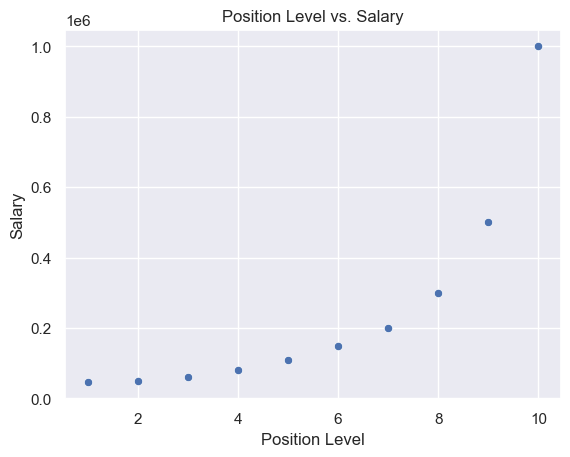

In [49]:
sns.scatterplot(x=X.flatten(), y=y)
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Position Level vs. Salary')
plt.show()


In [51]:
degrees = [2, 3, 4]

In [53]:
results = {}

# Loop through each degree, fit the model, make predictions, and evaluate

Degree 2: Mean Squared Error = 6758833333.33, R^2 Score = 0.92


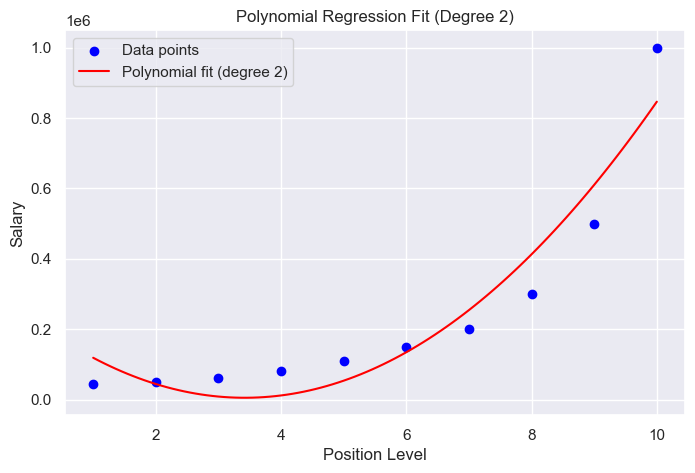

Degree 3: Mean Squared Error = 1515662004.66, R^2 Score = 0.98


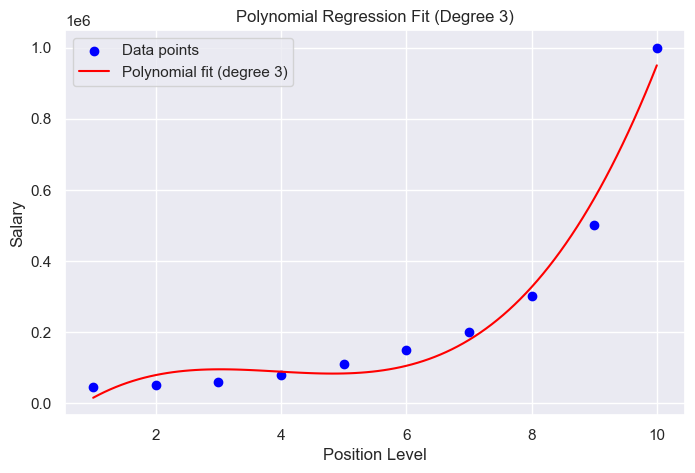

Degree 4: Mean Squared Error = 210343822.84, R^2 Score = 1.00


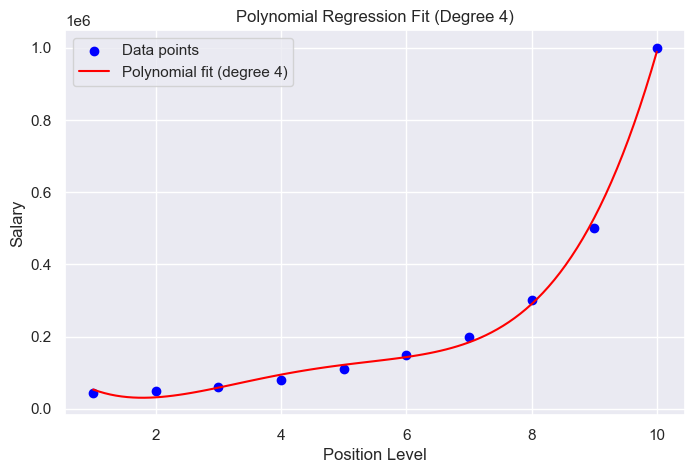

In [57]:
for degree in degrees:
    # Step 1: Create a pipeline for polynomial regression
    # The pipeline applies polynomial feature transformation, then fits linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # STEP2: FIT THE MODEL TO THE DATA
    model.fit(X, y)
    # Step 3: Make predictions on the transformed data
    y_pred = model.predict(X)
    #Step 4: Evaluate the model
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    results[degree] = {'MSE': mse, 'R^2': r2}
    print(f"Degree {degree}: Mean Squared Error = {mse:.2f}, R^2 Score = {r2:.2f}")
    # Step 5: Visualize the Polynomial Regression Fit
    # Generate a smooth curve for visualization by creating more data points in the range of X
    X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    y_range_pred = model.predict(X_range)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X_range, y_range_pred, color='red', label=f'Polynomial fit (degree {degree})')
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.title(f'Polynomial Regression Fit (Degree {degree})')
    plt.legend()
    plt.show()

# Summary of results

In [59]:
print("\nSummary of Results:")
for degree, metrics in results.items():
    print(f"Degree {degree}: MSE = {metrics['MSE']:.2f}, R^2 = {metrics['R^2']:.2f}")


Summary of Results:
Degree 2: MSE = 6758833333.33, R^2 = 0.92
Degree 3: MSE = 1515662004.66, R^2 = 0.98
Degree 4: MSE = 210343822.84, R^2 = 1.00
